In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10, 8) 

# EDA / Preprocessing

## Load Data

In [4]:
data = pd.read_excel('c:/Users/nickc/DataScience/NickAMC.github.io/DATA_624_S24/project_2/data_files/StudentData.xlsx')

In [220]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Carb Volume,2557.0,5.370334,0.106398,5.040000,5.293333,5.346667,5.453333,5.700
Fill Ounces,2529.0,23.974918,0.087466,23.633333,23.920000,23.973333,24.026667,24.320
PC Volume,2528.0,0.277239,0.060599,0.079333,0.239333,0.271333,0.312000,0.478
Carb Pressure,2540.0,68.190268,3.538609,57.000000,65.600000,68.200000,70.600000,79.400
Carb Temp,2541.0,141.092239,4.034063,128.600000,138.400000,140.800000,143.800000,154.000
PSC,2534.0,0.084643,0.049249,0.002000,0.048000,0.076000,0.112000,0.270
PSC Fill,2544.0,0.195299,0.117789,0.000000,0.100000,0.180000,0.260000,0.620
PSC CO2,2528.0,0.056440,0.043064,0.000000,0.020000,0.040000,0.080000,0.240
Mnf Flow,2567.0,24.626958,119.501399,-100.200000,-100.000000,70.200000,140.800000,229.400
Carb Pressure1,2535.0,122.570414,4.727226,105.600000,119.000000,123.200000,125.400000,140.200


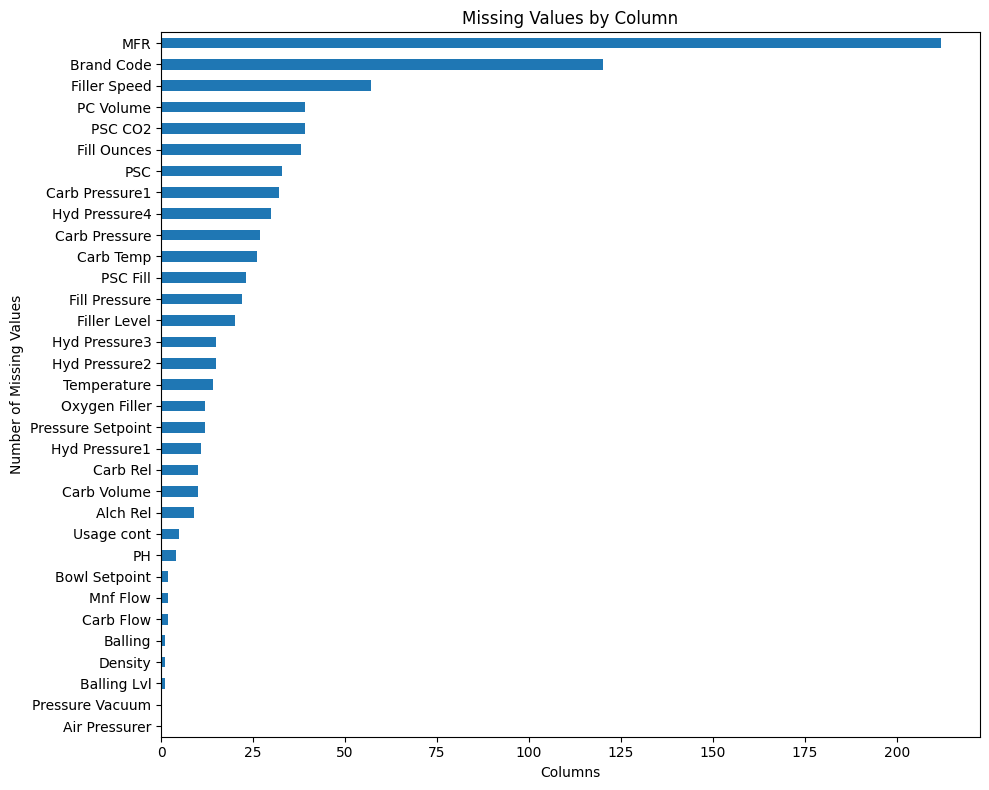

In [171]:
data.isna().sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.tight_layout()  
plt.show()

## Remove Features with more that 5% missing data

In [172]:
missing_pct= data.isna().mean() * 100
missing_pct_sorted = missing_pct.sort_values(ascending=False)
missing_pct_sorted

MFR                  8.245819
Brand Code           4.667445
Filler Speed         2.217036
PC Volume            1.516919
PSC CO2              1.516919
Fill Ounces          1.478024
PSC                  1.283547
Carb Pressure1       1.244652
Hyd Pressure4        1.166861
Carb Pressure        1.050175
Carb Temp            1.011280
PSC Fill             0.894594
Fill Pressure        0.855698
Filler Level         0.777907
Hyd Pressure3        0.583431
Hyd Pressure2        0.583431
Temperature          0.544535
Pressure Setpoint    0.466744
Oxygen Filler        0.466744
Hyd Pressure1        0.427849
Carb Volume          0.388954
Carb Rel             0.388954
Alch Rel             0.350058
Usage cont           0.194477
PH                   0.155581
Carb Flow            0.077791
Mnf Flow             0.077791
Bowl Setpoint        0.077791
Balling              0.038895
Density              0.038895
Balling Lvl          0.038895
Air Pressurer        0.000000
Pressure Vacuum      0.000000
dtype: flo

Remove `MFR` column due to missingness

In [173]:
data.drop('MFR', inplace=True, axis =1)

In [174]:
data = data.dropna(subset=['PH'])

## Impute Missing with Median

In [175]:
data['Brand Code'] = data['Brand Code'].fillna('Unknown')

In [176]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

data_imputed = imputer.fit_transform(data.drop('Brand Code', axis =1))

data_imputed = pd.DataFrame(data_imputed, columns=data.iloc[:,1:].columns)

In [177]:
data_imputed.isna().sum()

Carb Volume          0
Fill Ounces          0
PC Volume            0
Carb Pressure        0
Carb Temp            0
PSC                  0
PSC Fill             0
PSC CO2              0
Mnf Flow             0
Carb Pressure1       0
Fill Pressure        0
Hyd Pressure1        0
Hyd Pressure2        0
Hyd Pressure3        0
Hyd Pressure4        0
Filler Level         0
Filler Speed         0
Temperature          0
Usage cont           0
Carb Flow            0
Density              0
Balling              0
Pressure Vacuum      0
PH                   0
Oxygen Filler        0
Bowl Setpoint        0
Pressure Setpoint    0
Air Pressurer        0
Alch Rel             0
Carb Rel             0
Balling Lvl          0
dtype: int64

In [178]:
data['Brand Code'].isna().sum()

0

In [179]:
data_imputed['Brand Code'] = data['Brand Code']

In [180]:
data_imputed = data_imputed.dropna()

In [181]:
data_imputed

,Carb Volume,Fill Ounces,PC Volume,Carb Pressure,Carb Temp,PSC,PSC Fill,PSC CO2,Mnf Flow,Carb Pressure1,...,Pressure Vacuum,PH,Oxygen Filler,Bowl Setpoint,Pressure Setpoint,Air Pressurer,Alch Rel,Carb Rel,Balling Lvl,Brand Code
0,5.340000,23.966667,0.263333,68.2,141.2,0.104,0.26,0.04,-100.0,118.8,...,-4.0,8.36,0.0220,120.0,46.4,142.6,6.58,5.32,1.48,B
1,5.426667,24.006667,0.238667,68.4,139.6,0.124,0.22,0.04,-100.0,121.6,...,-4.0,8.26,0.0260,120.0,46.8,143.0,6.56,5.30,1.56,A
2,5.286667,24.060000,0.263333,70.8,144.8,0.090,0.34,0.16,-100.0,120.2,...,-3.8,8.94,0.0240,120.0,46.6,142.0,7.66,5.84,3.28,B
3,5.440000,24.006667,0.293333,63.0,132.6,0.076,0.42,0.04,-100.0,115.2,...,-4.4,8.24,0.0300,120.0,46.0,146.2,7.14,5.42,3.04,A
4,5.486667,24.313333,0.111333,67.2,136.8,0.026,0.16,0.12,-100.0,118.4,...,-4.4,8.26,0.0300,120.0,46.0,146.2,7.14,5.44,3.04,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,5.500000,24.040000,0.248667,74.8,145.8,0.172,0.36,0.04,136.0,123.4,...,-5.8,8.86,0.0026,110.0,50.0,141.8,7.72,5.56,1.62,C
2563,5.506667,23.980000,0.254000,74.4,146.0,0.108,0.22,0.02,138.8,122.6,...,-5.6,8.88,0.0026,110.0,50.0,142.6,7.68,5.58,1.78,C
2564,5.346667,24.040000,0.280667,68.0,141.8,0.032,0.28,0.02,143.8,122.0,...,-5.6,8.68,0.0026,110.0,50.0,143.0,6.56,5.36,1.28,C
2565,5.366667,24.026667,0.264667,68.2,141.6,0.040,0.32,0.02,147.2,121.6,...,-5.4,8.56,0.0026,110.0,50.0,142.8,6.56,5.36,1.28,C


## OneHot Encoding

Using OneHotEncoder because categorical values have no obvcious instrinsic order.

In [197]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse_output=False)

enc_data = encoder.fit_transform(data_imputed[['Brand Code']])

encoded_brand_code= pd.DataFrame(enc_data, columns=encoder.get_feature_names_out(['Brand Code']))

data_enc = pd.concat([data_imputed, encoded_brand_code], join = 'inner', axis =1)

data_enc = data_enc.drop('Brand Code', axis = 1)

In [198]:
data_enc

,Carb Volume,Fill Ounces,PC Volume,Carb Pressure,Carb Temp,PSC,PSC Fill,PSC CO2,Mnf Flow,Carb Pressure1,...,Pressure Setpoint,Air Pressurer,Alch Rel,Carb Rel,Balling Lvl,Brand Code_A,Brand Code_B,Brand Code_C,Brand Code_D,Brand Code_Unknown
0,5.340000,23.966667,0.263333,68.2,141.2,0.104,0.26,0.04,-100.0,118.8,...,46.4,142.6,6.58,5.32,1.48,0.0,1.0,0.0,0.0,0.0
1,5.426667,24.006667,0.238667,68.4,139.6,0.124,0.22,0.04,-100.0,121.6,...,46.8,143.0,6.56,5.30,1.56,1.0,0.0,0.0,0.0,0.0
2,5.286667,24.060000,0.263333,70.8,144.8,0.090,0.34,0.16,-100.0,120.2,...,46.6,142.0,7.66,5.84,3.28,0.0,1.0,0.0,0.0,0.0
3,5.440000,24.006667,0.293333,63.0,132.6,0.076,0.42,0.04,-100.0,115.2,...,46.0,146.2,7.14,5.42,3.04,1.0,0.0,0.0,0.0,0.0
4,5.486667,24.313333,0.111333,67.2,136.8,0.026,0.16,0.12,-100.0,118.4,...,46.0,146.2,7.14,5.44,3.04,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,5.246667,24.060000,0.263333,66.8,142.4,0.106,0.14,0.02,158.0,124.2,...,50.0,142.8,6.52,5.26,1.60,0.0,0.0,1.0,0.0,0.0
2559,5.260000,24.140000,0.320667,69.8,145.8,0.064,0.08,0.00,156.8,126.2,...,50.0,142.4,6.52,5.40,1.58,0.0,0.0,1.0,0.0,0.0
2560,5.266667,23.926667,0.312000,67.6,143.2,0.142,0.06,0.02,159.2,125.0,...,50.0,142.4,6.50,5.28,1.62,0.0,0.0,1.0,0.0,0.0
2561,5.320000,24.113333,0.275333,62.8,136.0,0.080,0.32,0.08,144.4,124.4,...,50.0,142.4,6.52,5.30,1.60,0.0,0.0,1.0,0.0,0.0


In [199]:
X = data_enc.drop('PH', axis = 1)
y = data_enc[['PH']]

## Standard Scaler

In [200]:
from sklearn.preprocessing import StandardScaler

features_to_scale = X.iloc[:,:-5]

scaler = StandardScaler()

features_scaled = pd.DataFrame(scaler.fit_transform(features_to_scale), columns = features_to_scale.columns)

X_scaled = pd.concat([features_scaled, encoded_brand_code], axis = 1)

In [210]:
X_scaled = X_scaled.dropna()

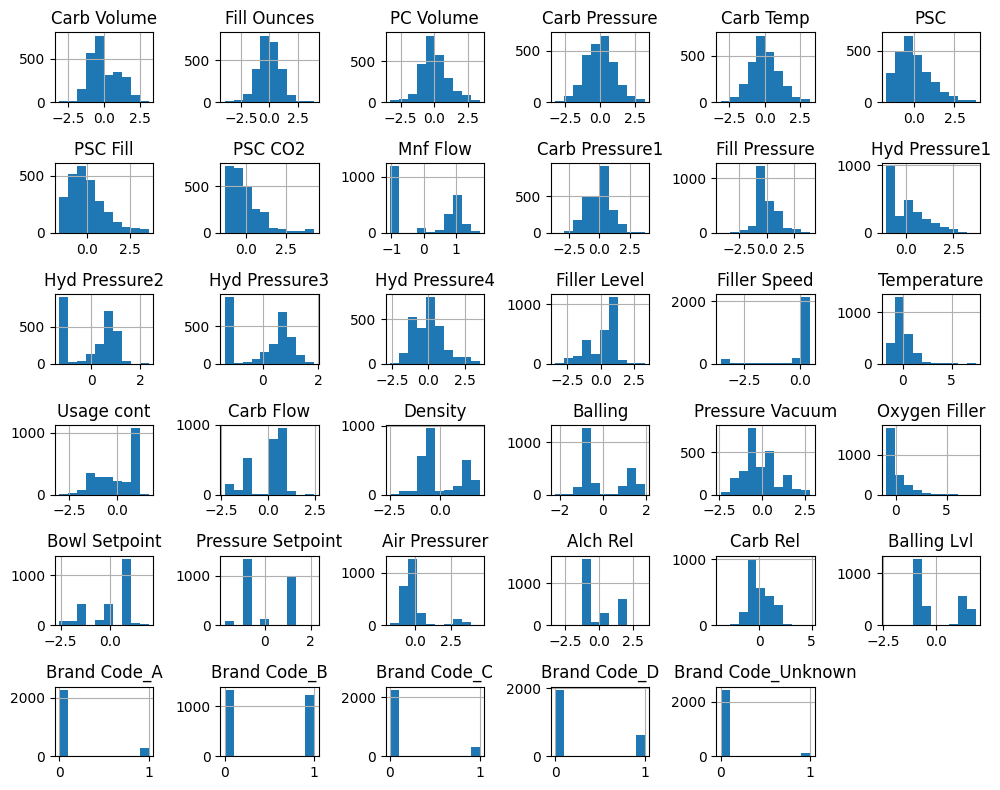

In [201]:
X_scaled.hist()
plt.tight_layout()
plt.show()

## Multicollinearity Check

In [202]:
corr_matrix = X_scaled.corr()

threshold = 0.8

high_corr_var=np.where(corr_matrix>threshold)

high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]


In [203]:
high_corr_var

[('Hyd Pressure2', 'Hyd Pressure3'),
 ('Filler Level', 'Bowl Setpoint'),
 ('Density', 'Balling'),
 ('Density', 'Alch Rel'),
 ('Density', 'Carb Rel'),
 ('Density', 'Balling Lvl'),
 ('Balling', 'Alch Rel'),
 ('Balling', 'Carb Rel'),
 ('Balling', 'Balling Lvl'),
 ('Alch Rel', 'Carb Rel'),
 ('Alch Rel', 'Balling Lvl'),
 ('Carb Rel', 'Balling Lvl')]

Lets remove `Density`, `Balling`, `Alch Rel`, `Filler Level`, and `Hyd Pressure 3`.

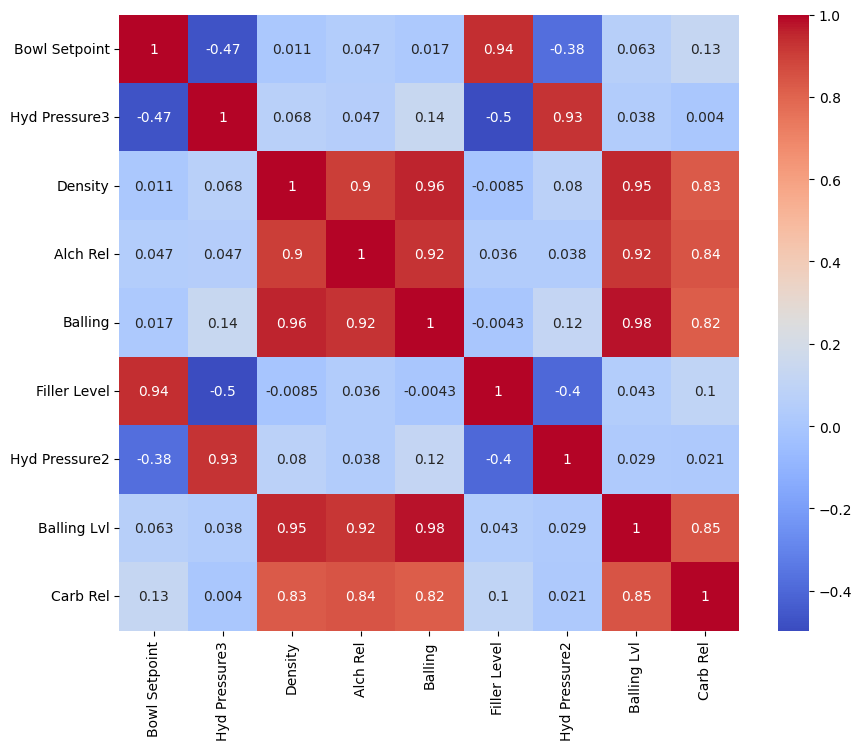

In [204]:
features_high_corr = list(set([item for sublist in high_corr_var for item in sublist]))

X_high_corr = X_scaled[features_high_corr]

sns.heatmap(X_high_corr.corr(), annot=True, cmap='coolwarm')
plt.show()

In [205]:
features_to_drop = ['Density', 'Balling', 'Alch Rel', 'Filler Level','Hyd Pressure3', 'Carb Rel']

X_scaled.drop(features_to_drop, axis = 1,inplace = True)

In [212]:
X_final = X_scaled.copy()

In [213]:
X_final.shape

(2559, 29)

In [214]:
y.shape

(2559, 1)

In [215]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.33, random_state=2024, shuffle=True)

In [ ]:
X_train

In [219]:
X_train.to_csv('X_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_train.to_csv('y_train.csv',index = False)
y_test.to_csv('y_test.csv', index = False)